In [1]:
import math
import numpy as np
import matplotlib
from math import factorial
from matplotlib import pyplot as plt
from sympy.functions.combinatorial.numbers import stirling
from scipy.stats import norm
from scipy.misc import comb
%matplotlib inline

In [2]:
matplotlib.rc('font', family='DejaVu Sans')

In [3]:
def permutations_with_cycles(n, k):
    '''Число перестановок n элементов с ровно k циклами.'''
    return stirling(n, k, kind=1, signed=False)

In [4]:
def get_cycles_number_distribution(n):
    '''Распределение числа циклов в случайной перестановке.'''
    return [permutations_with_cycles(n, k) / math.factorial(n) for k in range(1, n + 1)]

In [5]:
def get_distribution_function(distribution):
    '''Возвращает функцию распределения заданного распределения.'''
    result = [0]
    for i in range(len(distribution)):
        result.append(result[-1] + distribution[i])
    return result

In [6]:
def normalize_values(values, E, D):
    '''Нормализует величину.
    
    Все значения сдвигает на величину математического ожидания и делит на квадратный корень из дисперсии.'''
    return [(value - E) / D**0.5 for value in values]

In [7]:
def unnormalize_values(normalized_values, E, D):
    '''Обращает нормализацию.'''
    return [value * D**0.5 + E for value in normalized_values]

In [8]:
def get_distribution(distribution_function):
    '''Возвращает распределение, соответствующее данной функции распределения.'''
    return [distribution_function[i] - distribution_function[i - 1] for i in range(1, len(distribution_function))]

## Constants

In [9]:
n = 55
numbers_from_1_to_n = list(range(1, n + 1))
figure_size = (16, 8)

## Task 1

<Container object of 3 artists>

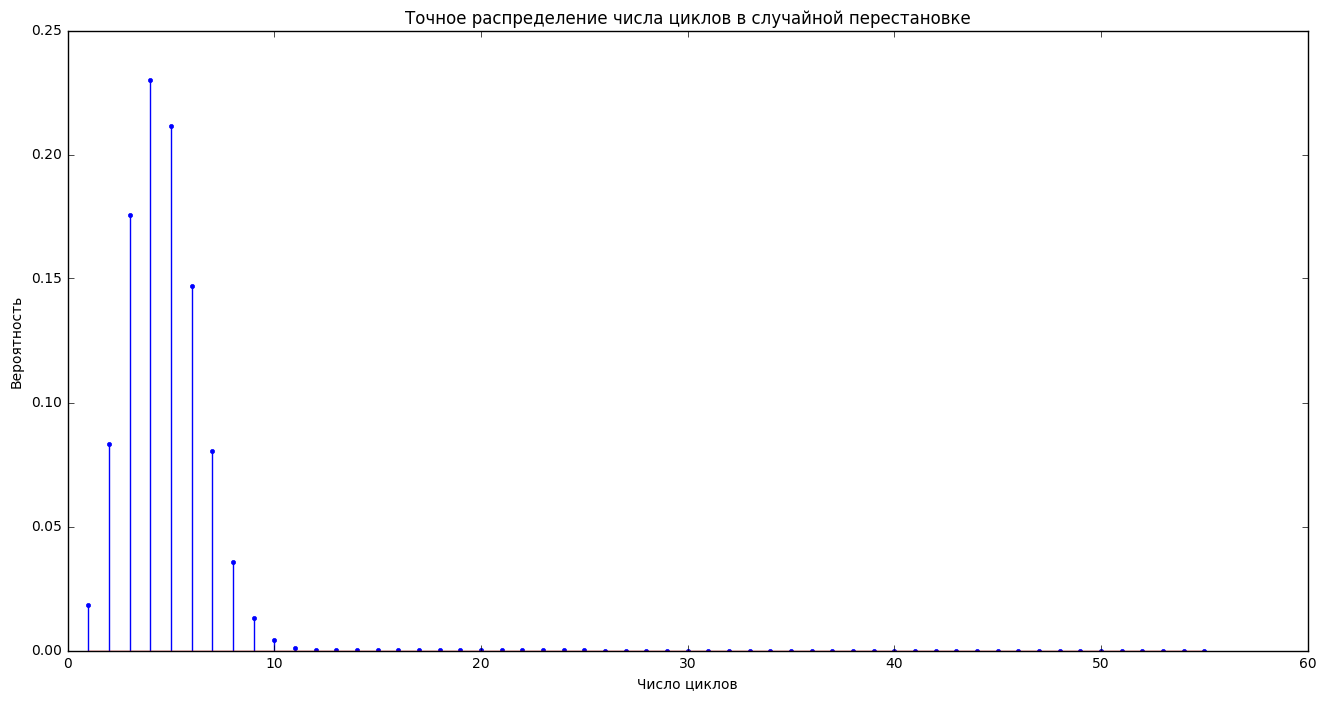

In [10]:
cycles_number_distribution = get_cycles_number_distribution(n)
x = numbers_from_1_to_n
y = cycles_number_distribution

plt.figure(figsize=figure_size)
plt.title('Точное распределение числа циклов в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Вероятность')
plt.stem(x, y, linefmt='b-', markerfmt='b.')

## Task 2

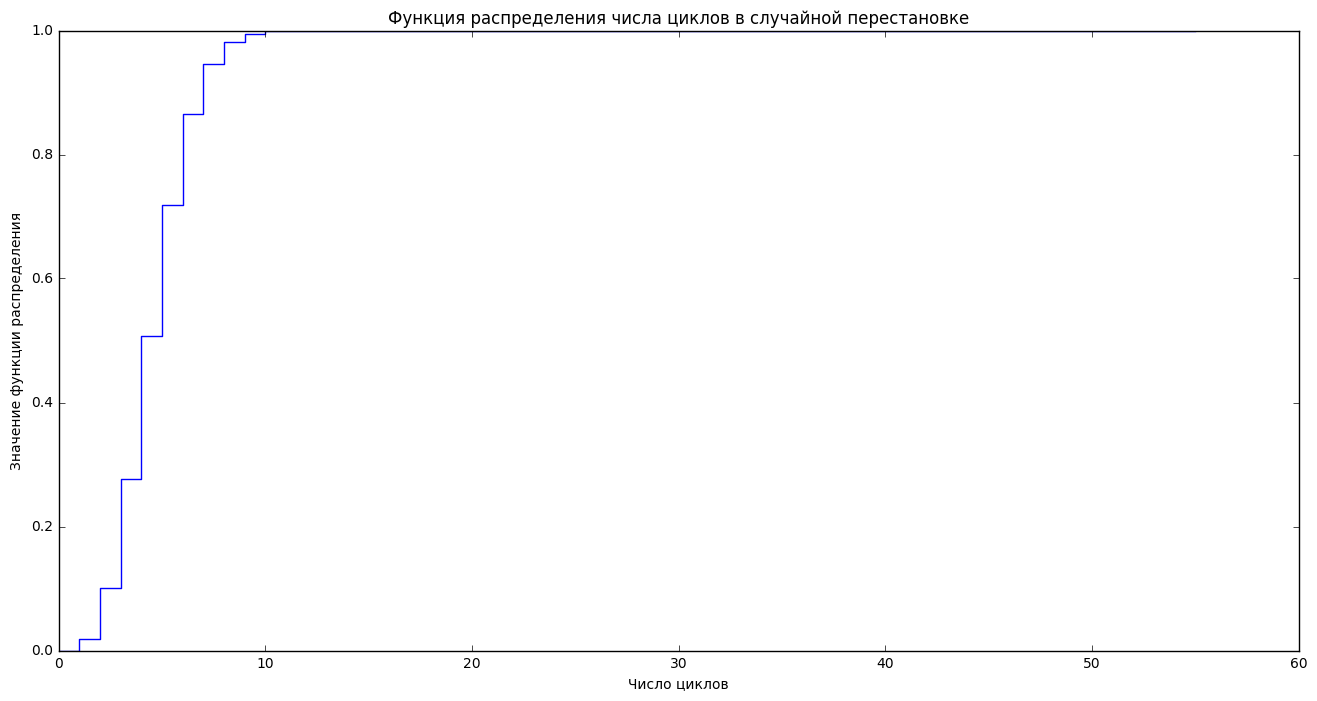

In [11]:
distribution_function = get_distribution_function(cycles_number_distribution)

x = [0] + numbers_from_1_to_n
y = distribution_function

plt.figure(figsize=figure_size)
plt.title('Функция распределения числа циклов в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Значение функции распределения')
plt.plot(x, y, 'b-', drawstyle='steps-post')

## Task 3

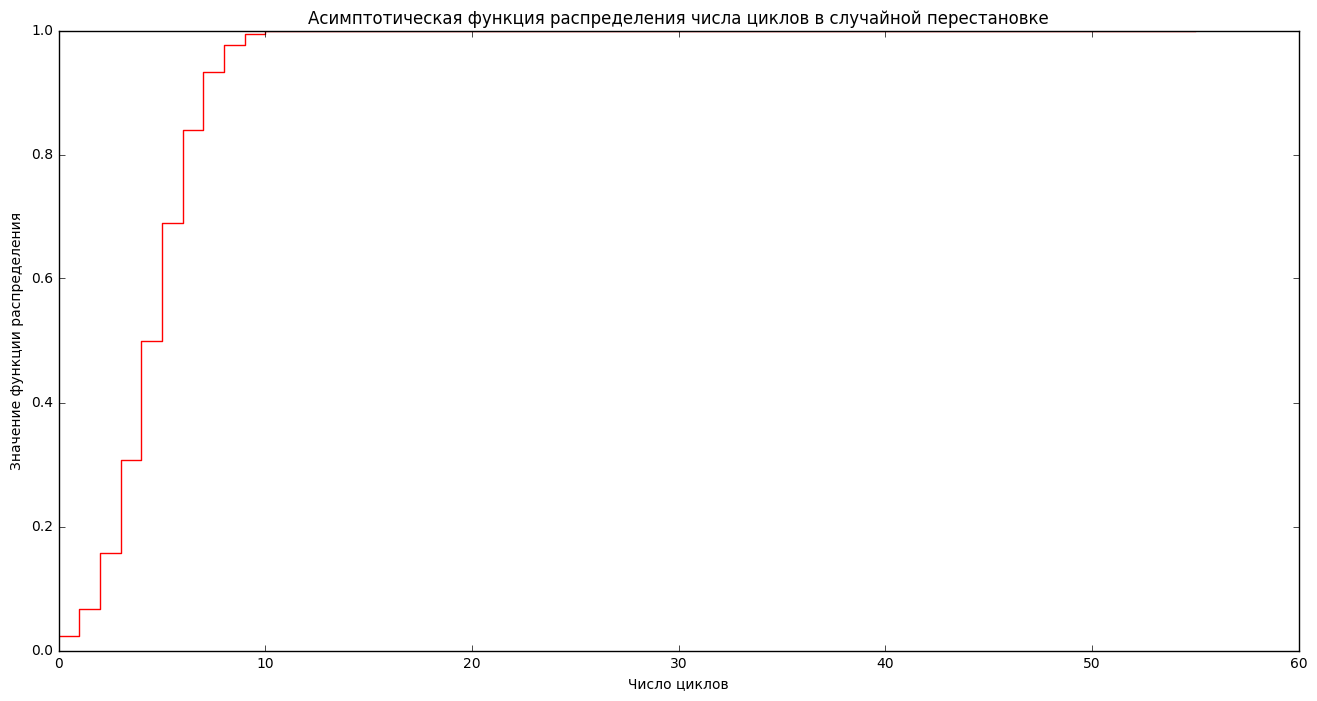

In [12]:
unnormalized_cycles_number = [0] + numbers_from_1_to_n
normalized_cycles_number = normalize_values(unnormalized_cycles_number, math.log(n), math.log(n))
norm_distribution_function = norm.cdf(normalized_cycles_number)  # Вычисление функции нормального распределения в данных точках.

x = unnormalized_cycles_number
y = norm_distribution_function

plt.figure(figsize=figure_size)
plt.title('Асимптотическая функция распределения числа циклов в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Значение функции распределения')
plt.plot(x, y, 'r-', drawstyle='steps-post')

## Task 4

<Container object of 3 artists>

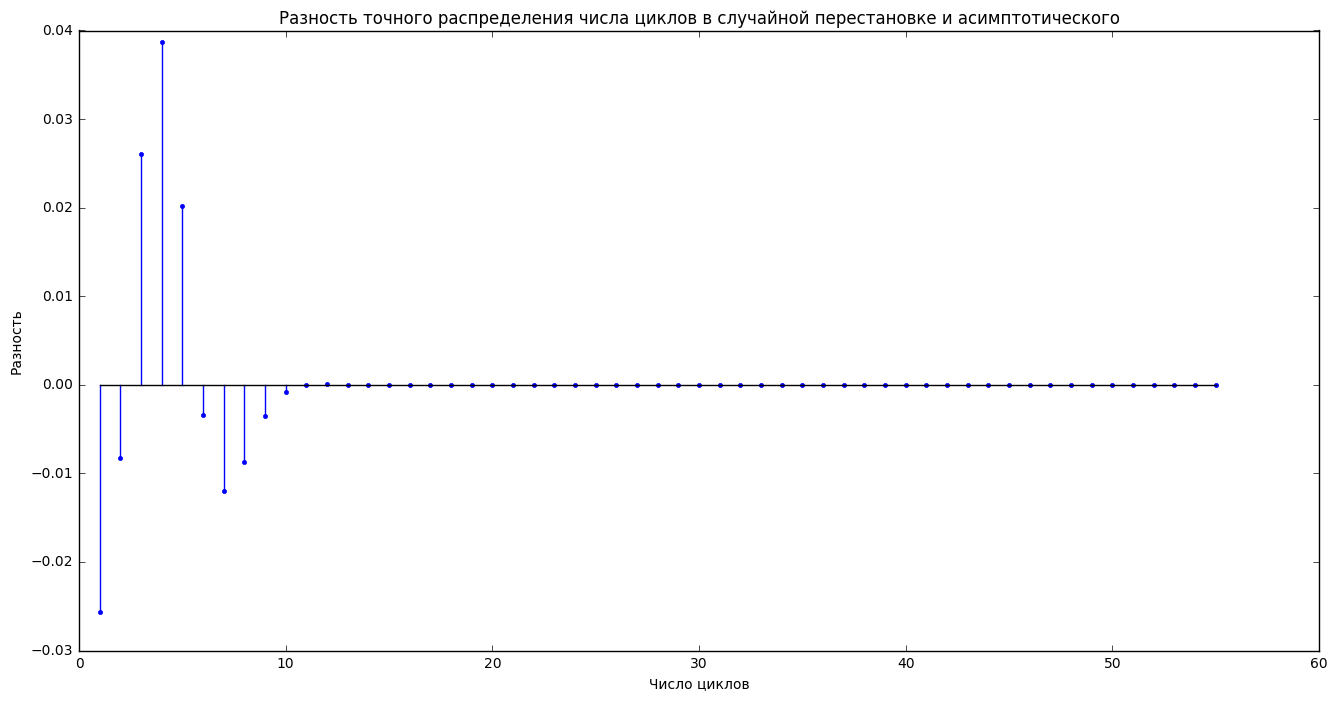

In [45]:
cycles_number_distribution  # Точное распределение.
norm_cycles_number_distribution = get_distribution(norm_distribution_function)  # Асимптотическое распределение.
cycles_number_difference = np.array(cycles_number_distribution) -\
                           np.array(norm_cycles_number_distribution)  # Их разность.

x = numbers_from_1_to_n
y = cycles_number_difference

plt.figure(figsize=figure_size)
plt.title('Разность точного распределения числа циклов в случайной перестановке и асимптотического')
plt.xlabel('Число циклов')
plt.ylabel('Разность')
#plt.plot(x, y, 'm-', drawstyle='steps-post')
plt.stem(x, y, linefmt='b-', markerfmt='b.', basefmt='k-')

## Utilities

In [14]:
def get_probability_cycles_of_length_j_is_exactly_i(j, i, n):
    '''Возвращает вероятность того, что в случайной перестановке из n элементов циклов длины j ровно i.'''
    return sum([ (-1)**(l-i) / (factorial(i) * factorial(l-i) * j**l) for l in range(i, n // j + 1) ])

In [15]:
def get_distribution_of_cycles_with_length_j(j, n):
    '''Возвращает распределение числа циклов длины j в случайной перестановке из n элементов.'''
    return [get_probability_cycles_of_length_j_is_exactly_i(j, i, n) for i in range(1, n + 1)]

In [16]:
j_to_test = (1, 2, 3, 10, 20)
colors = ('r', 'b', 'k', 'm', 'g')

## Task 5

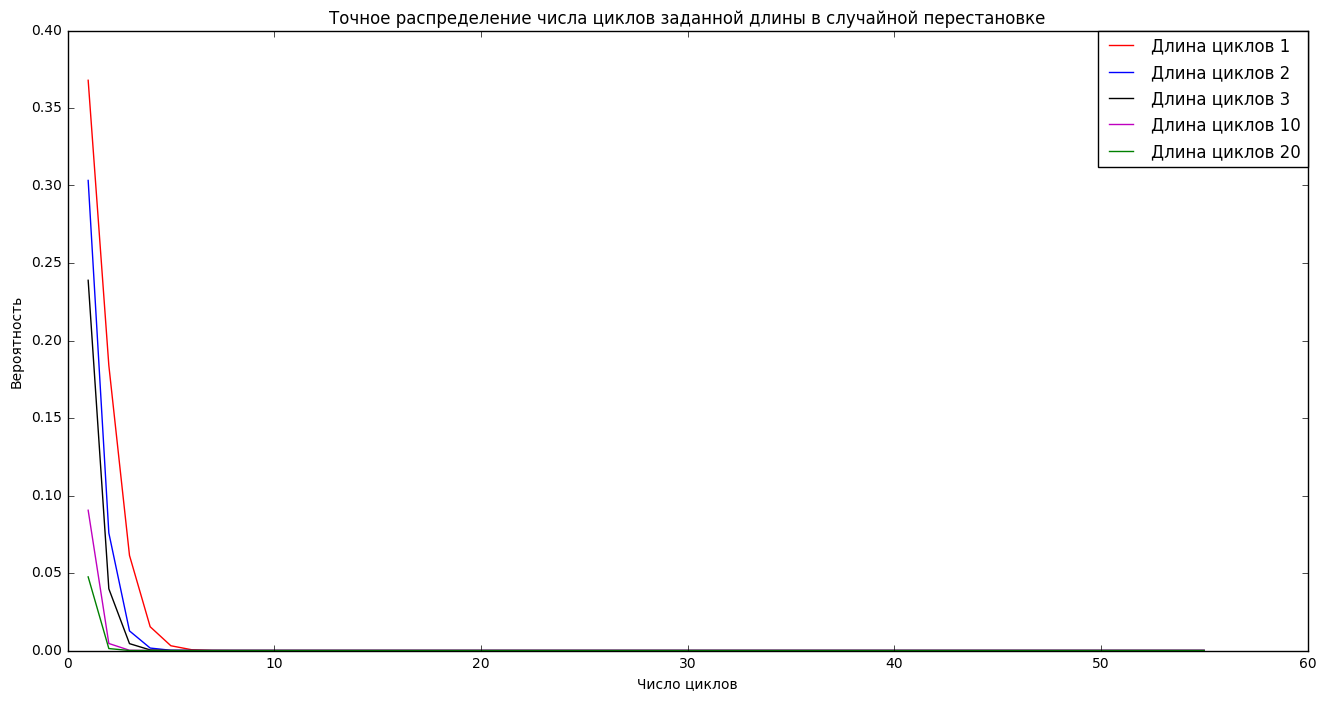

In [41]:
distributions_of_cycles_with_length_j = {j: get_distribution_of_cycles_with_length_j(j, n) for j in j_to_test}

x = numbers_from_1_to_n

plt.figure(figsize=figure_size)
plt.title('Точное распределение числа циклов заданной длины в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Вероятность')
for i in range(5):
    j = j_to_test[i]
    color = colors[i]
    
    y = distributions_of_cycles_with_length_j[j]
    format_string = '{}-'.format(color)
    plt.plot(x, y, format_string, label='Длина циклов {}'.format(j))
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

## Task 6

In [18]:
from scipy.stats import poisson

In [22]:
def get_poisson_distribution_of_cycles_with_length_j(j, n):
    '''Возвращает Пуассоновское распределение числа циклов длины j в случайной перестановке из n элементов.'''
    return [poisson.pmf(i, 1/j) for i in range(1, n + 1)]

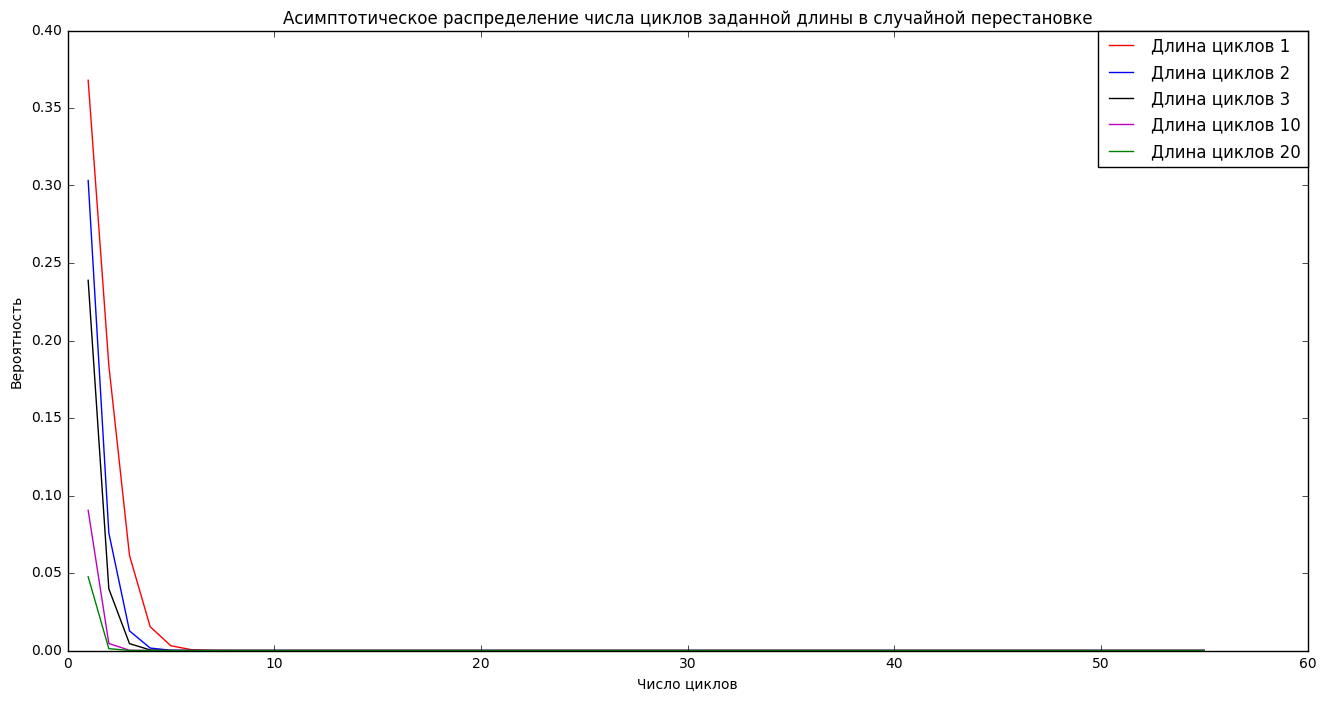

In [42]:
poisson_distributions_of_cycles_with_length_j = {j: get_poisson_distribution_of_cycles_with_length_j(j, n) for j in j_to_test}

x = numbers_from_1_to_n

plt.figure(figsize=figure_size)
plt.title('Асимптотическое распределение числа циклов заданной длины в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Вероятность')
for i in range(5):
    j = j_to_test[i]
    color = colors[i]
    
    y = poisson_distributions_of_cycles_with_length_j[j]
    format_string = '{}-'.format(color)
    plt.plot(x, y, format_string, label='Длина циклов {}'.format(j))
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

## Task 7

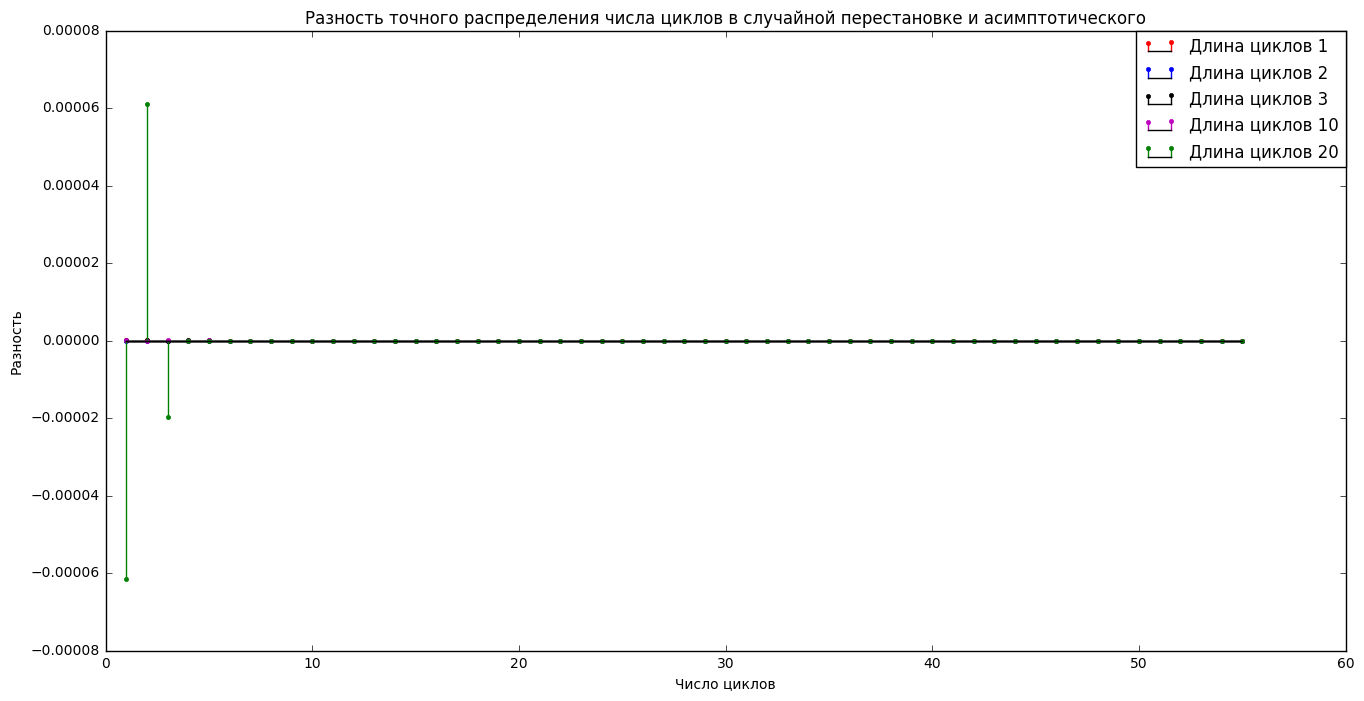

In [46]:
distributions_of_cycles_with_length_j  # Точное распределение.
poisson_distributions_of_cycles_with_length_j  # Асимптотическое распределение.
# Их разность.
distributions_of_cycles_difference =\
{j: np.array(distributions_of_cycles_with_length_j[j]) - np.array(poisson_distributions_of_cycles_with_length_j[j]) for j in j_to_test}

x = numbers_from_1_to_n

plt.figure(figsize=figure_size)
plt.title('Разность точного распределения числа циклов в случайной перестановке и асимптотического')
plt.xlabel('Число циклов')
plt.ylabel('Разность')
for i in range(5):
    j = j_to_test[i]
    color = colors[i]
    
    y = distributions_of_cycles_difference[j]
    format_string = '{}-'.format(color)
    #plt.plot(x, y, format_string)
    plt.stem(x, y, linefmt='{}-'.format(color), markerfmt='{}.'.format(color), label='Длина циклов {}'.format(j), basefmt='k-')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)